# Projeto 3
## Ciência dos Dados
### João Laet de Toledo, Kaique Dognani e Rebecca Cohen

#### Nosso trabalho consiste em criar uma regressão que estimasse o valor do sálario de um jogador de futebol. Foi feito então um programa que prevê esse salário baseado nas qualidades de cada jogador. Para isso, criamos um Data Set com os dados do site www.sofifa.com que tem os valores criados pelo jogo de vídeo game Fifa 18, com mais de 17 mil jogadores registrados. Dentre todas as características disponíveis na base de dados, foram escolhidas para trabalhar, as escolhidas pelo grupo como mais importantes, que são: visão, posicionamento, controle de bola, dividida de pé, finalização, cabeceio, entre outras.

#### *A criação do Data Frame e a limpeza dos dados está no outro arquivo de Notebook para facilitar o manuseamentos dos dados.

In [1]:
# Módulos importados para o funcionamento deste código;

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet as ElasticNetImpl

In [2]:
# Linha que importa o arquivo que contém o dataset;

dados = pd.read_csv('Dataset_Final.csv')

#### Como queríamos um dataset aleatório, usamos a função Shuffle para misturar todos os jogadores.

In [3]:
# Código para embaralhar as linhas do dataset;

dados = shuffle(dados)

#### Escolhemos as seguintes características de cada jogador, pois foram as que julgamos mais importantes para avaliá-los: idade, qualidade, potencial, preço, especialidades, drible, finalização, marcação, visão de jogo, interceptação, cruzamento, bote, posicionamento e cabeceio. Todas essas características possuiam valor quantitativo, que importamos diretamente do site www.sofifa.com.

In [4]:
# Colunas com os dados que serão analisados pelas regressões;

atributos = ["Idade", "Qualidade", "Potencial","Preço", "Especial", "Drible", "Finalização", "Marcação", "Visão", "Interceptação"
             , "Cruzamento", "Bote", "Posicionamento", "Cabeceio"]
y = ["Salário"]

#### Limpamos e separamos o dataset em 80% para treinamento e 20% para teste, chamando de train e test, respectivamente.

In [5]:
# Limpar o dataset;

for i in atributos:
    dados = dados[dados[i] != 0] 
dados = dados.dropna()


# Separa o dataset, 80% para treinamento e 20% para teste;

train, test = train_test_split(dados, test_size=0.2)


#### Uma regressão linear é uma equação para se estimar a condicional (um valor esperado) de uma variável Y, dados os valores de algumas outras variáveis X. O nosso modelo, por possuir muitas variáveis X diferentes, era bastante complexo e difícil de visualizar em um único gráfico de regressão simples, por exemplo. Por isso, buscamos outros modelos de regressões lineares que pudessem se encaixar no nosso problema, o Ridge e o Lasso. 

#### Esses modelos, procuram determinar funções que se adequem aos pontos da variável Y em função das distintas variáveis X. Para isso, o modelo calcula diferentes parâmetros de "importância" de cada variável. Por exemplo, após observar cerca de 14000 jogadores (aproximadamente 80% do nosso dataset) pode ser percebido que a variável posicionamento não era tão importante assim, mas que a marcação do jogador "contava" mais. Ou que o potencial do jogador vale mais que o cabeceio. Assim, o modelo determinou diferentes parâmetros para cada variável. Com esses valores era possível determinar uma função. 

#### Além desses diferentes parâmetros, as regressões Ridge e Lasso possuem também um método de "penalização/minimização" de erros. Para isso, ela usa um hiperparâmetro, chamado aqui de alpha. A penalização da Ridge consiste na multiplicação do alpha pela soma dos quadrados dos parâmetros. Enquanto a da Lasso consiste no alpha vezes a soma dos números absolutos dos parâmetros. Essa minimização de erros serve para determinar o quanto a função se encaixa aos pontos. Quanto maior o alpha, maior a precisão dos pontos. Porém, essa precisão não é tão eficiente, pois ao trocar do modelo de treinamento para o de teste, a função é tão precisa ao treinamento, que pode ser que não se adeque tanto ao de teste. Logo, devemos escolher/testar diferentes alphas para entender qual é o melhor para o nosso problema. 


#### Para resolver o problema proposto e conseguir estimar o salário de um jogador baseado em suas características, testamos os dois tipos de regressão citados acima; Ridge e Lasso. Abaixo comparamos os resultados:

In [6]:
# Função que realiza a regressão Ridge;

def ridge_regression(train, atributos, alpha):
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(train[atributos],train['Salário'])
    y_pred = ridgereg.predict(train[atributos])
    return(y_pred)

#### Aqui comparamos os resultados da "predição" do salário com o salário verdadeiro do jogador, através do método de "Mean Squared Error" ou a raíz da média do erro ao quadrado. Testamos com diferentes alphas para descobrir qual deles retornava o menor erro. Observamos que quando o alpha já era suficientemente pequeno (0,0001/1e-10/1e-15), o erro se estabilizou em 16076,53 (Euros).

In [7]:
# Estudo para escolher o melhor alpha para a regressão;

alphas = [10, 5, 2, 1, 0.01, 0.001, 0.0001, 1e-10, 1e-15]

for valor in alphas:
    Regressão_Ridge = ridge_regression(train, atributos, valor)
    print((mean_squared_error(train['Salário'],Regressão_Ridge))**(1/2))

20312.7516069
19230.1546377
17762.1293466
16916.96712
16078.3143863
16076.561567
16076.5352438
16076.5349649
16076.5349649


#### Usamos o alpha que estabilizava o erro para criar um gráfico de salário estimado (Y do gráfico) por salário real (X do gráfico). Se os valores fossem exatamente os mesmos (predição 100% correta) o gráfico deveria plotar os pontos em uma linha de 45 graus, onde o valor de X fosse o mesmo de Y em todos os pontos. Observando o gráfico abaixo, podemos perceber que isso não ocorre, justificando assim o erro grande observado acima.

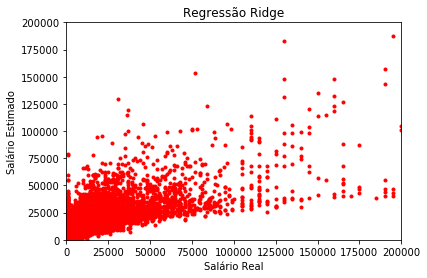

In [38]:
# Uso do melhor alpha para fazer o gráfico;

R_R = ridge_regression(train, atributos, 0.001)

plt.plot(train['Salário'],R_R,'.', color="red")
plt.axis([0, 200000, 0, 200000])
plt.title("Regressão Ridge")
plt.xlabel("Salário Real")
plt.ylabel("Salário Estimado")
plt.show()

#### Mesmo método utilizado na Ridge acima, agora foi utilizado na Lasso abaixo.

In [9]:
# Função que realiza a regressão Lasso;

def lasso_regression(train, atributos, alpha):
    lassoreg = Lasso(alpha=alpha,normalize=True)
    lassoreg.fit(train[atributos],train['Salário'])
    y_predl = lassoreg.predict(train[atributos])
    return(y_predl)

#### Abaixo, diferentes alphas foram testados a fim de determinar o menor erro. Pode ser observado que para um alpha de 0,01 o erro já estabiliza, sendo 16076,53 euros.

In [10]:
# Estudo para escolher o melhor alpha para a regressão;

alphas = [10, 5, 2, 1, 0.01, 0.001, 0.0001]

for valor in alphas:
    Regressão_Lasso = lasso_regression(train, atributos, valor)
    print((mean_squared_error(train['Salário'],Regressão_Lasso))**(1/2))

16168.6850495
16121.2583499
16103.4714816
16099.8030473
16076.5407904
16076.5350233
16076.5349655


#### Abaixo, o gráfico da Lasso foi plotado da mesma maneira feita com a Ridge. Os gráficos são basicamente os mesmos e os erros mínimos observados nos dois modelos também foram praticamente os mesmos.

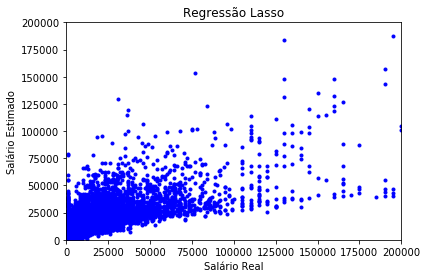

In [39]:
# Uso do melhor alpha para fazer o gráfico;

R_L = lasso_regression(train, atributos, 0.01)
plt.plot(train['Salário'],R_L,'.', color="blue")
plt.axis([0, 200000, 0, 200000])
plt.title("Regressão Lasso")
plt.xlabel("Salário Real")
plt.ylabel("Salário Estimado")
plt.show()

#### Após testarmos as funções e os alphas com 80% do nosso dataset, vamos implementá-los no teste (os 20% restantes). Os resultados (erro e gráfico foram plotados abaixo).

In [12]:
# Uso dos conhecimentos obtidos durante o treino para realizar o teste de regressão Ridge;

alpha = 0.001

r_R = ridge_regression(test, atributos, alpha)
print((mean_squared_error(test['Salário'],r_R))**(1/2))

18039.8092864


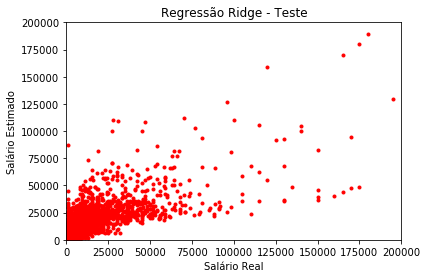

In [47]:
R_R = ridge_regression(test, atributos, 0.001)

plt.plot(test['Salário'],R_R,'.', color="red")
plt.axis([0, 200000, 0, 200000])
plt.title("Regressão Ridge - Teste")
plt.xlabel("Salário Real")
plt.ylabel("Salário Estimado")
plt.show()

In [13]:
# Uso dos conhecimentos obtidos durante o treino para realizar o teste de regressão Lasso; 

alpha = 0.01

r_L = lasso_regression(test, atributos, alpha)
print((mean_squared_error(test['Salário'],r_L))**(1/2))

18039.7944091


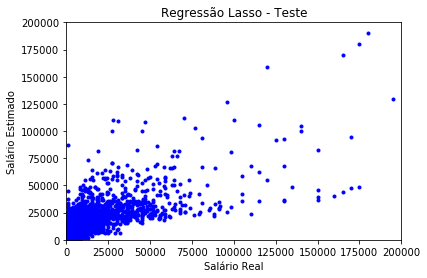

In [48]:
R_L = lasso_regression(test, atributos, 0.01)
plt.plot(test['Salário'],R_L,'.', color="blue")
plt.axis([0, 200000, 0, 200000])
plt.title("Regressão Lasso - Teste")
plt.xlabel("Salário Real")
plt.ylabel("Salário Estimado")
plt.show()

#### Novamente foi possível observar um erro bastante grande (maior até que o de treinamento, provavelmente por se tratar de uma base de dados menor), e uma comparação praticamente igual. Os erros foram basicamente os mesmos com as duas regressões, assim como os dois gráficos. 

#### Abaixo, foram feitas as contas de erro percentual dos dois modelos para o teste. Como o erro quadrático, foi possível observar uma porcentagem muito alta de erro nos dois modelos; 223%.

In [49]:
np.sum(abs((test.Salário - R_R)/test.Salário))*(100/len(test))

222.89272989013347

In [50]:
np.sum(abs((test.Salário - R_L)/test.Salário))*(100/len(test))

222.90411015415117

#### Como não obtivemos um resultado positivo (nosso erro foi muito grande, tanto percentual quanto quadrático), testamos um terceiro modelo de regressão. Chamado de ElasticNet, esse modelo é uma junção da Ridge com a Lasso. Ele usa dos dois métodos de penalização para minimizar mais ainda o erro do modelo.

In [15]:
parameters = {'alpha': 10**np.linspace(-2, 10, 20),
              'l1_ratio': np.linspace(0.01, 1, 10)}

In [16]:
clf = GridSearchCV(ElasticNetImpl(normalize=True), parameters, cv=20, n_jobs=-1, scoring='neg_mean_absolute_error')

In [17]:
clf.fit(train[atributos],train['Salário'])

GridSearchCV(cv=20, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'alpha': array([  1.00000e-02,   4.28133e-02,   1.83298e-01,   7.84760e-01,
         3.35982e+00,   1.43845e+01,   6.15848e+01,   2.63665e+02,
         1.12884e+03,   4.83293e+03,   2.06914e+04,   8.85867e+04,
         3.79269e+05,   1.62378e+06,   6.95193e+06,   2.97635e+07,
         1.27427e+08,   5.45559e+08,   2.33572e+09,   1.00000e+10]), 'l1_ratio': array([ 0.01,  0.12,  0.23,  0.34,  0.45,  0.56,  0.67,  0.78,  0.89,  1.  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [18]:
clf.cv_results_['mean_test_score']

array([-11754.4373188 , -11728.26432195, -11695.12366829, -11651.67517808,
       -11592.15323687, -11505.85894843, -11369.23335418, -11120.59423061,
       -10518.28838276,  -8377.35743372, -11923.20758402, -11916.54319251,
       -11908.00032031, -11896.6567989 , -11880.84876061, -11857.34971085,
       -11818.7400325 , -11743.81080535, -11534.02858421,  -8373.89848423,
       -11964.41833948, -11962.84219331, -11960.81692334, -11958.11866728,
       -11954.3451416 , -11948.69365419, -11939.29789272, -11920.5934882 ,
       -11865.26010122,  -8361.58784783, -11974.12517712, -11973.75888833,
       -11973.28801103, -11972.66028911, -11971.78169814, -11970.46429207,
       -11968.26989517, -11963.88589364, -11950.7720801 ,  -8341.41973641,
       -11976.39689716, -11976.31438331, -11976.20829749, -11976.06685573,
       -11975.86884875, -11975.57186344, -11975.07695497, -11974.0873894 ,
       -11971.12070182,  -8270.4563922 , -11976.92775231, -11976.91158533,
       -11976.89079937, -

In [19]:
clf.cv_results_['std_test_score']

array([ 737.37687299,  736.77426674,  736.10199777,  735.28418518,
        734.27303414,  732.57453688,  729.80532737,  724.99228751,
        708.89375242,  491.52352434,  740.94867647,  740.83396608,
        740.67961267,  740.47315888,  740.18674966,  739.7247045 ,
        738.88216479,  737.12824783,  733.16454641,  491.13720153,
        741.66466394,  741.63709068,  741.60168471,  741.55455597,
        741.48872744,  741.39031525,  741.22717134,  740.90413548,
        739.88472062,  489.67111709,  741.83495532,  741.82853639,
        741.82028593,  741.80928962,  741.79390301,  741.77084111,
        741.73245256,  741.65585479,  741.42748736,  485.26414325,
        741.87490019,  741.87346722,  741.87162496,  741.86916883,
        741.86573065,  741.86057431,  741.85198281,  741.83480891,
        741.78335971,  490.42839323,  741.88423949,  741.88397357,
        741.88363167,  741.88317582,  741.88253765,  741.88158042,
        741.87998513,  741.87679488,  741.86722678,  500.30930

In [20]:
clf.cv_results_['params']

({'alpha': 0.01, 'l1_ratio': 0.01},
 {'alpha': 0.01, 'l1_ratio': 0.12},
 {'alpha': 0.01, 'l1_ratio': 0.23000000000000001},
 {'alpha': 0.01, 'l1_ratio': 0.34000000000000002},
 {'alpha': 0.01, 'l1_ratio': 0.45000000000000001},
 {'alpha': 0.01, 'l1_ratio': 0.56000000000000005},
 {'alpha': 0.01, 'l1_ratio': 0.67000000000000004},
 {'alpha': 0.01, 'l1_ratio': 0.78000000000000003},
 {'alpha': 0.01, 'l1_ratio': 0.89000000000000001},
 {'alpha': 0.01, 'l1_ratio': 1.0},
 {'alpha': 0.042813323987193938, 'l1_ratio': 0.01},
 {'alpha': 0.042813323987193938, 'l1_ratio': 0.12},
 {'alpha': 0.042813323987193938, 'l1_ratio': 0.23000000000000001},
 {'alpha': 0.042813323987193938, 'l1_ratio': 0.34000000000000002},
 {'alpha': 0.042813323987193938, 'l1_ratio': 0.45000000000000001},
 {'alpha': 0.042813323987193938, 'l1_ratio': 0.56000000000000005},
 {'alpha': 0.042813323987193938, 'l1_ratio': 0.67000000000000004},
 {'alpha': 0.042813323987193938, 'l1_ratio': 0.78000000000000003},
 {'alpha': 0.04281332398719393

In [51]:
modelo_good = clf.best_estimator_

#### Acima foram testados diferentes alphas e parâmetros da função (através do treinamento) para que ela estimasse o melhor a ser utilizado no teste. 

In [52]:
y_pred = modelo_good.predict(test[atributos])

In [23]:
y_pred

array([  7410.38261157,   4800.2834375 ,  12268.86685393, ...,
         5732.12819489,  21638.27820675,  15085.84478652])

#### O resultado dos salários previstos nos testes pode ser observado acima. Abaixo, foi calculado o erro quadrádico (como feito anteriormente com a Ridge e com a Lasso). Pudemos observar que o erro foi até um pouco maior do que nos dois modelos anteriores: 18738 euros. Foi calculada também a média de erro absoluta; 8310 euros. E por último (também como feito anteriormente) foi calculado o erro percentual, que diminuiu de 223% para 203% um número ainda bastante alto.

In [24]:
np.sqrt(mean_squared_error(test.Salário, y_pred))

18738.292868764005

In [25]:
mean_absolute_error(test.Salário, y_pred)

8310.0754901916152

In [26]:
np.sum(abs((test.Salário - y_pred)/test.Salário))*(100/len(test))

203.0889736338971

#### Ao analisar o programa, percebemos que o erro foi bastante alto, o que causa uma falha no "sistema". Concluímos que o programa acima não pode ser usado para estimar o salário de um jogador, pelo menos não com as variáveis que julgamos importante. Provavelmente esse erro se deve ao fato de que os jogadores de diferentes posições possuem características diferentes. Por exemplo, um goleiro provavelmente não possui um nível de "cabeceio" tão alto, pois não utiliza muito dessa habilidade no seu trabalho. Assim como um zagueiro não precisa ser muito bom em "finalização" como um atacante deveria. E mesmo assim, esses jogadores podem ter salários altos, pois são ótimos em suas posições. Por outro lado, um bom meio-campista tem boas qualidades tanto de atacante como de zagueiro, pois atua nos dois lados do campo, mas pode ter um salário baixo pois não necessariamente se destaca em campo. Assim, o programa pode ter estimado valores de parâmetros altos/baixos para cada uma das habilidades, mas não levava em conta a posição do jogador ou o que ele realmente necessitava no seu trabalho e consequentemente o valor do seu salário. Por essas e outras razões como imperfeições da base de dados ou de cálculo de previsão, o nosso programa não modela com perfeição o nosso problema.

###### ***O projeto foi feito majoritarimente em sala de aula, com a presença dos três alunos em um único computador. As conclusões e melhorias foram feitas por partes em casa, divididas entre os alunos, e discutidas em grupo de whatsapp. Todos contribuíram da mesma forma no projeto porém não nos uploads dos arquivos.